In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from IPython.display import Image
from dotenv import load_dotenv
import os

load_dotenv()
model = ChatOpenAI(model=os.getenv("gpt_model"))

In [4]:
class WealthAdvisorState(TypedDict):
    age: int
    gender: str
    plan: str
    marital_status: str
    lifestyle: str
    monthly_income: str
    current_libility: str

    insurance: str
    investment: str
    budget_plan: str
    fesibility_check : str

In [5]:
def create_insurance_plan(state: WealthAdvisorState) -> WealthAdvisorState:
    prompt = f"""
    you are an assistant of a wealth advisor and you give advise on insurance
    the client details are as follow:-
    age: {state['age']}
    gender: {state['gender']}
    plan: {state['plan']}
    marital_status: {state['marital_status']}
    lifestyle: {state['lifestyle']}
    current_libility: {state['current_libility']}
    """
    insurance = model.invoke(prompt).content

    return {'insurance':insurance}

In [6]:
def create_investment_plan(state: WealthAdvisorState) -> WealthAdvisorState:
    prompt = f"""
    you are an assistant of a wealth advisor and you give advise on investment
    the client details are as follow:-
    age: {state['age']}
    gender: {state['gender']}
    plan: {state['plan']}
    marital_status: {state['marital_status']}
    lifestyle: {state['lifestyle']}
    monthly_income: {state['monthly_income']}
    current_libility: {state['current_libility']}
    """
    investment = model.invoke(prompt).content

    return {'investment':investment}

In [7]:
def create_budget_plan(state: WealthAdvisorState) -> WealthAdvisorState:
    prompt = f"""
    you are an assistant of a wealth advisor and you give advise on budget management
    the client details are as follow:-
    age: {state['age']}
    gender: {state['gender']}
    plan: {state['plan']}
    marital_status: {state['marital_status']}
    lifestyle: {state['lifestyle']}
    monthly_income: {state['monthly_income']}
    current_libility: {state['current_libility']}
    """
    budget_plan = model.invoke(prompt).content

    return {'budget_plan':budget_plan}

In [14]:
def fesibility_check(state: WealthAdvisorState) -> WealthAdvisorState:
    prompt = f"""
    you are an assistant of a wealth advisor and you do a fesibility check on client from the response from other agents has given. 
    you need to optimize the plans given by the other agents as per the fesibility of client
    the client details are as follow:-
    age: {state['age']}
    gender: {state['gender']}
    plan: {state['plan']}
    marital_status: {state['marital_status']}
    lifestyle: {state['lifestyle']}
    monthly_income: {state['monthly_income']}
    current_libility: {state['current_libility']}

    the advice by the agents are as follow:-
    budget agent: {state['budget_plan']}
    investment agent: {state['investment']}
    insurance agent: {state['insurance']}
    """
    state['fesibility_check'] = model.invoke(prompt).content

    return state

In [15]:
# create a graph

graph = StateGraph(WealthAdvisorState)

# add nodes
graph.add_node('create_insurance_plan',create_insurance_plan)
graph.add_node('create_investment_plan',create_investment_plan)
graph.add_node('create_budget_plan',create_budget_plan)
graph.add_node('fesibility_check',fesibility_check)

# add edges
graph.add_edge(START,'create_insurance_plan')
graph.add_edge(START,'create_investment_plan')
graph.add_edge(START,'create_budget_plan')

graph.add_edge('create_insurance_plan', 'fesibility_check')
graph.add_edge('create_investment_plan', 'fesibility_check')
graph.add_edge('create_budget_plan', 'fesibility_check')


graph.add_edge('fesibility_check',END)

# comple
workflow = graph.compile()

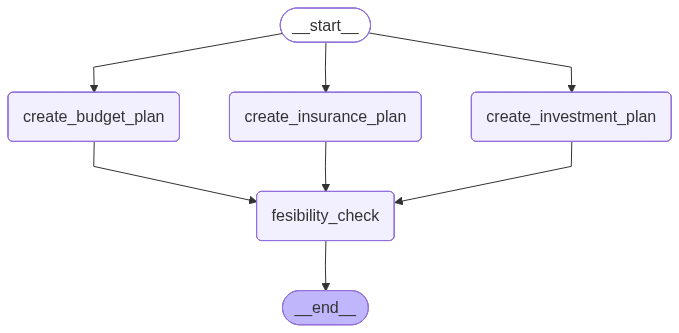

In [16]:
Image(workflow.get_graph().draw_mermaid_png())

In [17]:
# execute

initial_state = {
    'age': 29
    , 'gender': 'Male'
    , 'plan': 'i am planning to buy my home in next 5 years'
    , 'marital_status': 'Single'
    , 'lifestyle': 'i am fit and regular to GYM from several years now'
    , 'monthly_income': 'Rs. 1,50,000'
    , 'current_libility': 'i have an education loan pending for atleast 1 year, EMI-Rs. 20,000'
    }
reponse_state = workflow.invoke(initial_state)

In [18]:
print(reponse_state['fesibility_check'])

Given the details of the client and the advice provided by various agents, I’ll consolidate and optimize the proposed plans based on feasibility and prioritization for their goal of purchasing a home in the next five years.

### Client Overview
- **Age**: 29
- **Gender**: Male
- **Plan**: Buy a home in next 5 years
- **Marital Status**: Single
- **Lifestyle**: Fit and regular gym-goer
- **Monthly Income**: Rs. 1,50,000
- **Current Liability**: Education loan EMI of Rs. 20,000

---

### Optimized Financial Plan

#### 1. **Monthly Budget Overview**
   - **Income**: Rs. 1,50,000
   - **Current Expenses**:
     - Education Loan EMI: Rs. 20,000
     - Estimated Living Expenses: Rs. 50,000
     - Healthcare & Gym: Rs. 5,000
   - **Total Current Expenses**: Rs. 75,000
   - **Remaining Income for Savings/Investments**: Rs. 75,000

#### 2. **Budget Allocation for Savings and Investments**
Optimizing advice from the budget management and investment strategies, here’s a refined allocation for the